
author: EdgardoCS @FSU Jena
date: 04-06-2025


In [67]:
import math
import time

import numpy as np
from PIL import Image
from matplotlib import cm
import scipy.stats as stats
from scipy.ndimage import zoom
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

In [68]:
def count_match(input1, input2):
    """
    Takes two images in array format, determines where there is activation (a-band values) and
    calculates the % of match between the two images.
    :param input1: Image 1 in array format
    :param input2: Image 2 in array format
    :return: % of match between the two images
    """
    pixels = input1.shape[0] * input1.shape[1]

    arr1_pixels = 0
    arr2_pixels = 0
    any_pixel = 0
    n_match = 0
    for i in range(0, input1.shape[0]):
        for j in range(0, input1.shape[1]):
            # First, let see how many pixels have value in array 1
            if input1[i, j][3] != 0:
                arr1_pixels += 1
            # Let's do the same for array 2
            if input2[i, j][3] != 0:
                arr2_pixels += 1
            # Now, check whereas any of the two images has pixels
            if input1[i, j][3] != 0 or input2[i, j][3] != 0:
                any_pixel += 1
            # Finally, let's see where the meet
            if input1[i, j][3] != 0 and input2[i, j][3] != 0:
                n_match += 1
    #print("% of pixels with information in image 1", f' {(arr1_pixels * 100 / pixels):.2f}%')
    #print("% of pixels with information in image 2", f' {(arr2_pixels * 100 / pixels):.2f}%')

    total_match = n_match * 100 / any_pixel

    return total_match

In [69]:
def plot_heatmap(image_map1, image_map2, outline):
    """
    Plot the difference map between all images, uses absolute differences array as input.
    Numpy stack allow us to plot both arrays side by side without merging with PIL, which seems
    to delete the A-Band channel, which is our target channel.
    :param image_map1: Array of pixels from Image 1
    :param image_map2: Array of pixels from Image 2
    :param outline: Body outline in png format
    :return: Nothing
    """

    front_and_back = np.hstack((image_map1, image_map2))
    resized_arr = zoom(front_and_back, (1, 400 / 800), order=1)  # Scale width only

    plt.figure(1)
    plt.imshow(resized_arr, cmap='Reds', interpolation='nearest')
    plt.colorbar(label="Touch intensity")
    plt.imshow(outline)
    plt.savefig('output/Men Sex.png', format='png')
    plt.show()

72.26% pixels are matched between Image 1 and Image 2


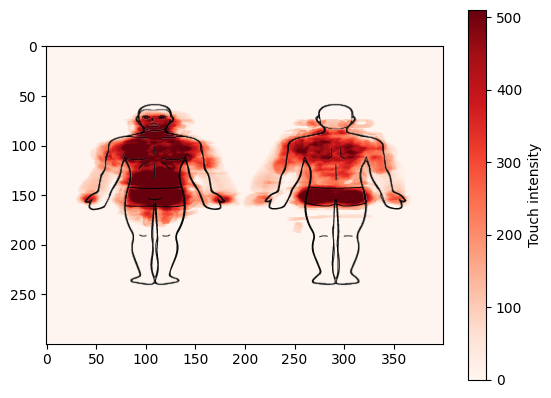

In [70]:
# Load images (target images)
image1 = Image.open('output/merge/Men Preferred Sex.png')  # could use .convert("RGBA")
image2 = Image.open('output/merge/Men Received Sex.png')
# Load body map outline
body_outline = Image.open("source/img/malebody400300.png")

# We want to compare front against front, and back against back
front1 = image1.crop((0, 0, 400, 300))
back1 = image1.crop((400, 0, 800, 300))

front2 = image2.crop((0, 0, 400, 300))
back2 = image2.crop((400, 0, 800, 300))

# Convert to numpy arrays, this will help us to navigate through the data with ease, using numpy instead
# of PIL of CV libraries
arr1 = np.array(front1)
arr2 = np.array(front2)
arr3 = np.array(back1)
arr4 = np.array(back2)

match_percentage = count_match(arr1, arr2)
print(f'{match_percentage:.2f}%', "pixels are matched between Image 1 and Image 2")

# Extract alpha chanel (transparency)
# Front
alpha1 = arr1[:, :, 3].astype(float)
alpha2 = arr2[:, :, 3].astype(float)
# Back
alpha3 = arr3[:, :, 3].astype(float)
alpha4 = arr4[:, :, 3].astype(float)

# Compute absolute differences (not sure about this part)
front_map = np.abs(alpha1 + alpha2)  # This acts as a "difference significance" map
back_map = np.abs(alpha3 + alpha4)
plot_heatmap(front_map, back_map, body_outline)

# Calculate t-test for t_map and p_map values.
# Use any arr shape since they are all the same in shape.
# t_map_front = np.zeros(shape=alpha1.shape)
# p_map_front = np.zeros(shape=alpha1.shape)
#
# t_map_back = np.zeros(shape=alpha1.shape)
# p_map_back = np.zeros(shape=alpha1.shape)